## Data source

- Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
- Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu) Research Center, RMI Group Leader Applied Physics Laboratory The Johns Hopkins University Johns Hopkins Road Laurel, MD 20707 (301) 953-6231 (c) Date received: 9 May 1990

## Attribute Information

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/home/znagy2/data_development/notebooks/ML_practice/input/diabetes.csv")

## Exploratory Data Analysis

### Understanding the variables

I'll check the dimension of the dataset as a first step.

In [3]:
print("We have ", data.shape[0], " individual observations, and ", data.shape[-1], " variables.")
data.head()

We have  768  individual observations, and  9  variables.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The variables are mainly numeric ones, only the Outcome is categorical variable.

I'll check the number of missing values in case of variables and visualize the dataset.

In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

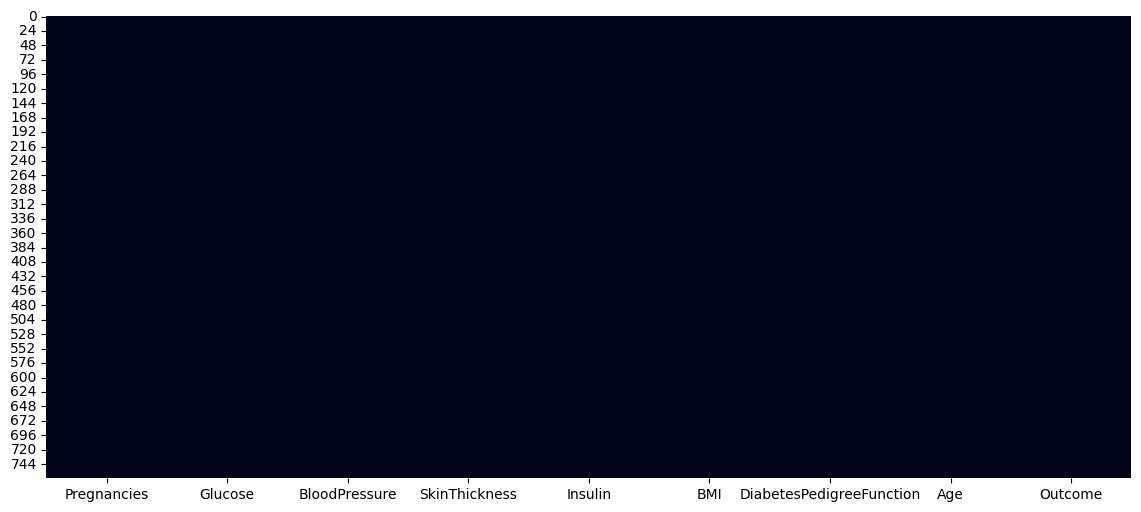

In [5]:
# visualize on a heatmap
plt.figure(figsize=(14,6))
sns.heatmap(data.isnull(), cbar=False)

We can conclude that there is no any missing value. Let me check the duplicated rows.

In [6]:
print("The dataset contains ", data.duplicated().sum(), " duplicated row(s).")

The dataset contains  0  duplicated row(s).


I'll check the data type of variables, it should be numeric (int or float).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


I do not have any duplicated rows, so I can check the number of unique values by variables.

In [8]:
data.nunique(axis=0)

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

I'll take a look on the basic statistic relating the columns.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The dataset is clean:
- data types looks like fine
- missing values were not identified
- duplicated rows were not identified

### Visualize data and relationships
 I'll calculate and plot the correlation matrix, which give me a better insight into the relationship of variables.

<Axes: >

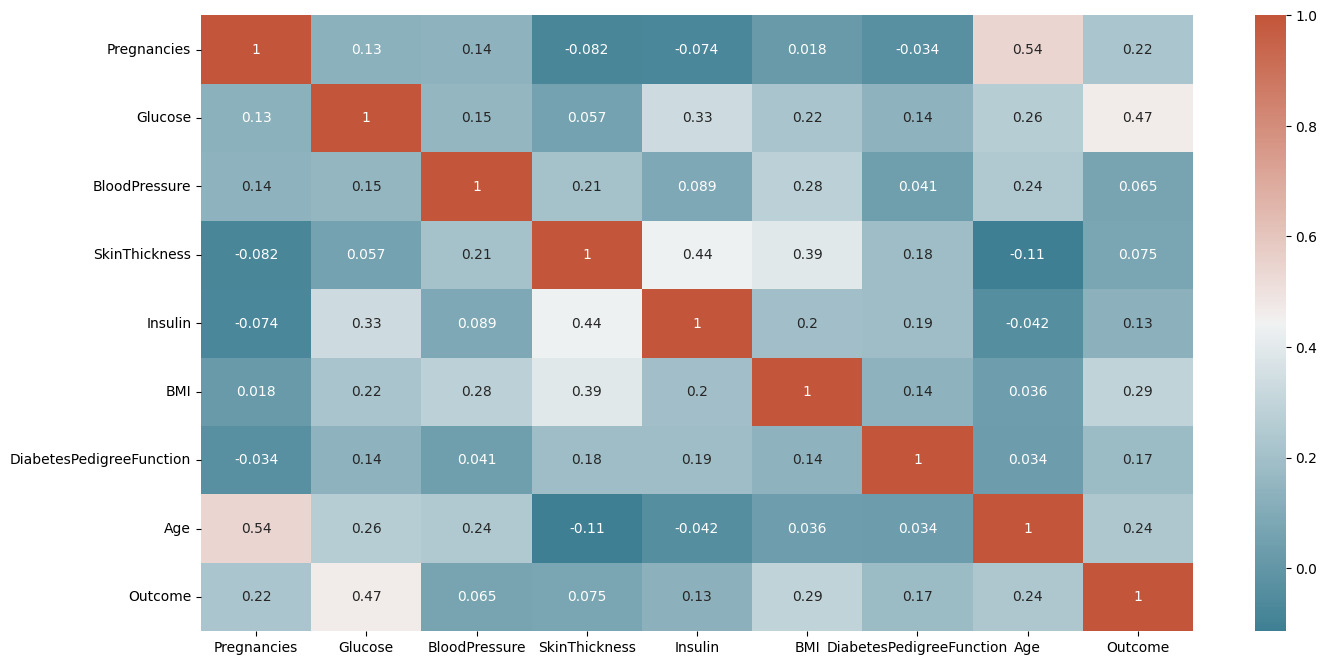

In [10]:
# calculate correlation matrix
corr = data.corr()
# plot the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Due to the several variables I won't go through the whole matrix, but I draw the main conclusions:
1. Correlation between the variables are mainly low (>-0.5 / <0.5)
2. The highest absolute correlation coefficient is 0.54 (Pregnancies - Age)

I'll visualize the correlation between the Outcome, Glucose (highest positive), BloodPressure (lovest correlation).

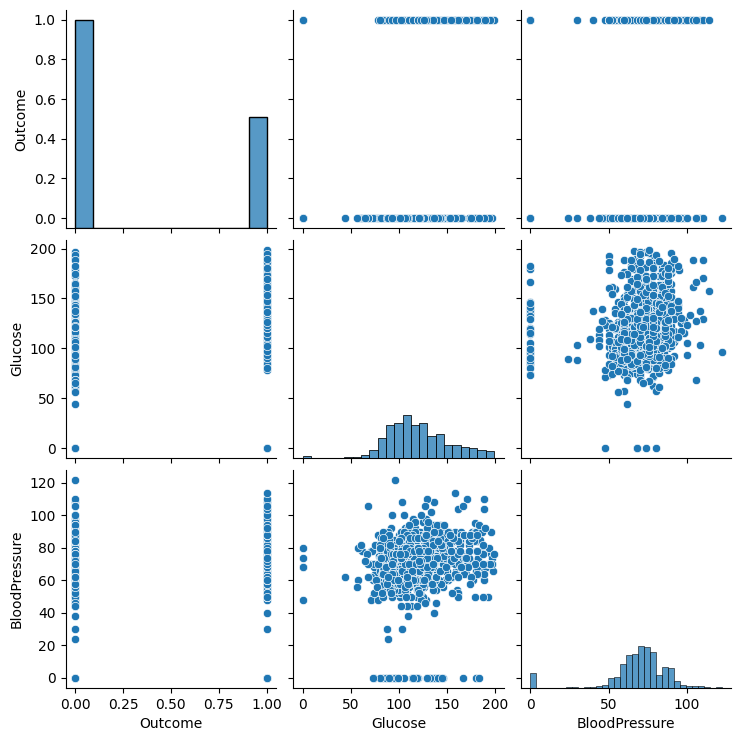

In [11]:
sns.pairplot(data.loc[:, ["Outcome","Glucose","BloodPressure"]])

Plots show that in case of variables, which has relatively high correlation coefficient, there is an overlap of Glucose values in case of diabetic or non-diabetic cases. The non-separation is stronger when the correlation decreases we can see this in case of BloodPressure - Outcome plot.

We can conclude that the dataset does not contain any characteristic variable, which could clearly predict the diabetic condition.

Finally, I'll plot the histograms and the box plot (to visualize outliers) in case of every variables with this utility function.

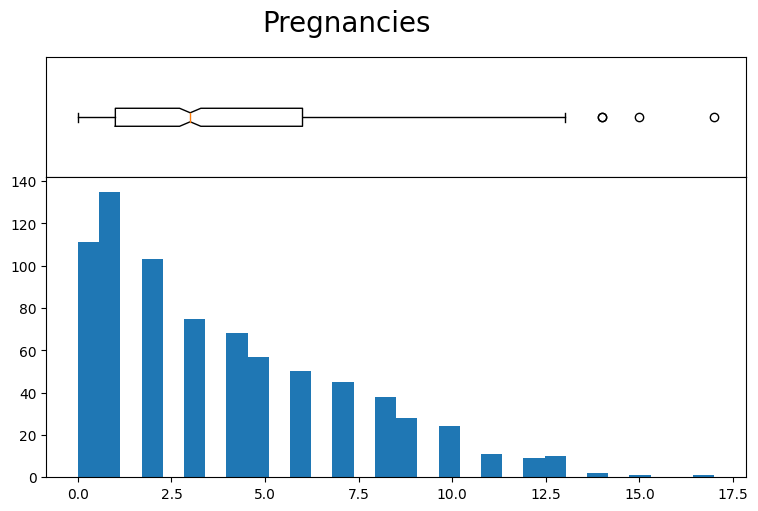

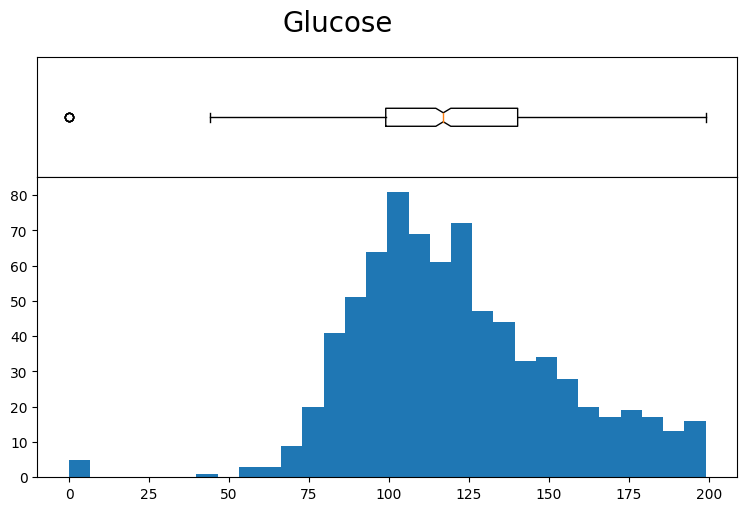

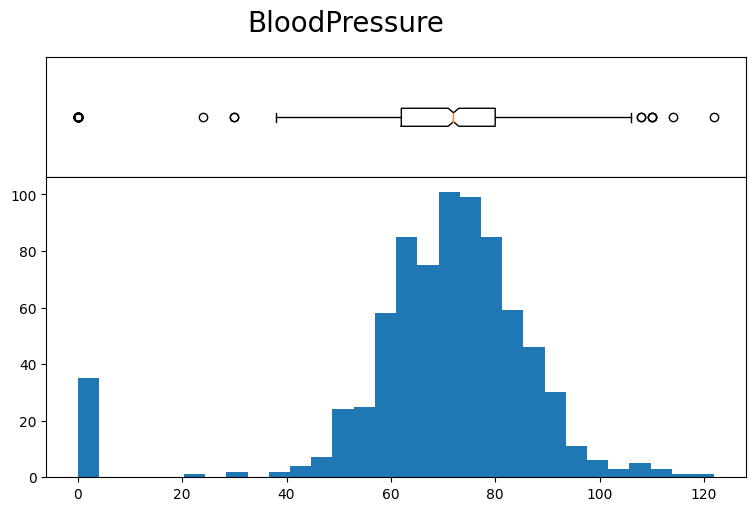

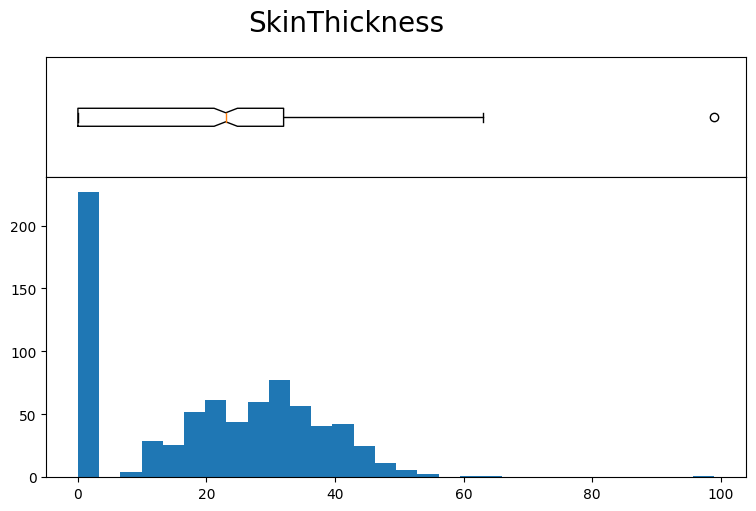

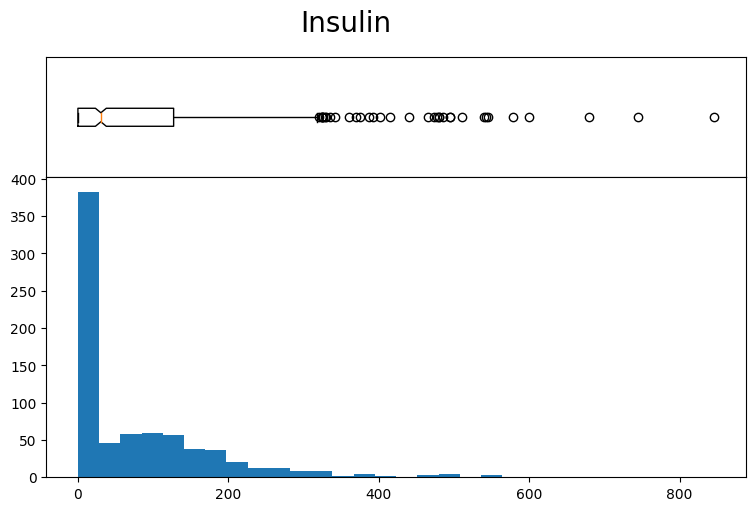

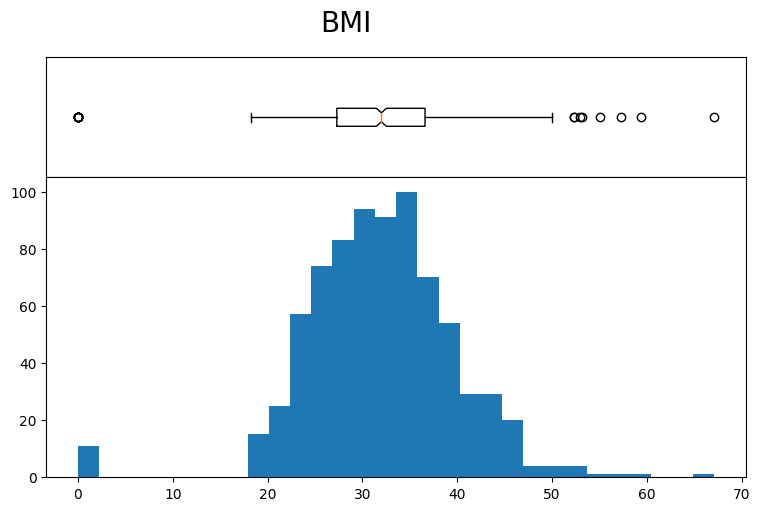

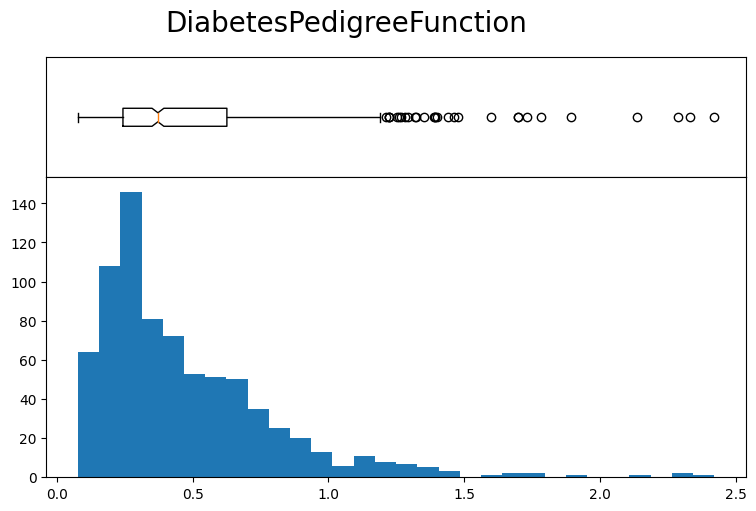

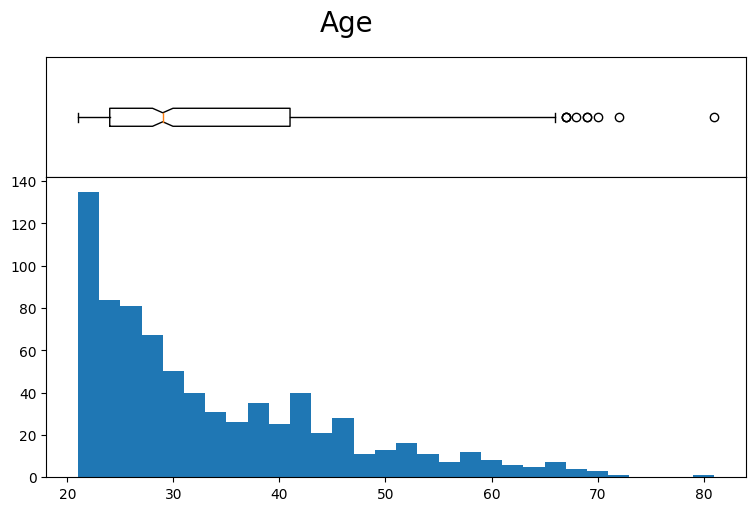

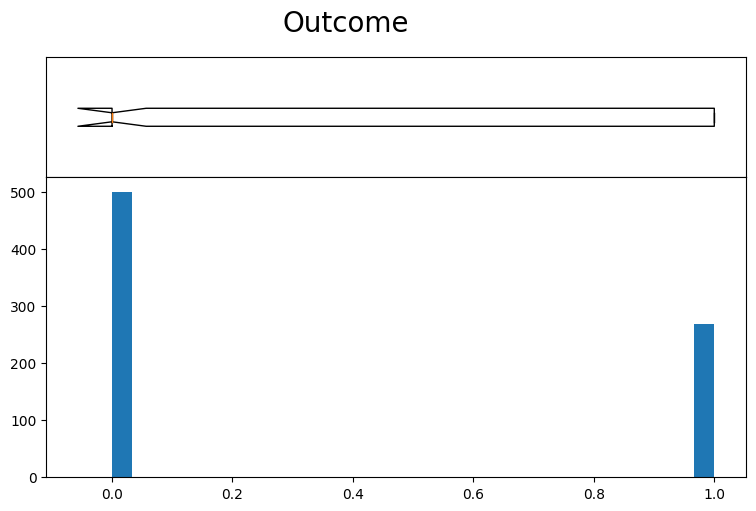

In [12]:
def hist_box_plots(dataframe):
    for variable in dataframe.columns:
        # setup the figure and axes
        fig = plt.figure(figsize=(10,6))
        bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                                    # (adjust as necessary)
        histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                                    # bottom + height on this line should
                                                    # equal bottom on bpAx line
        fig.suptitle(t=variable, fontsize=20)
        # plot stuff
        bp = bpAx.boxplot(data[variable], notch=True, vert=False)
        h = histAx.hist(data[variable], bins=30)

        # confirm that the axes line up 
        xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
        for ax in [bpAx, histAx]:
            ax.set_xlim([xlims.min(), xlims.max()])

        bpAx.set_xticklabels([])  # clear out overlapping xlabels
        bpAx.set_yticks([])  # don't need that 1 tick mark
        plt.show()

# apply the function
hist_box_plots(data)

From the outliers point of view, I can see some higher/high values in case of , which are outliers (Insuline, DiabetesPedigre, BMI). I think this data could be realistic, so I don't want to remove them.

However, the situation is different in case of low outliers (BMI, Insuline, SkinThickness, Glucose, BloodPressure). This could be wrong data, because nobody can live with 0 BloodPressure and weight (BMI calculated from weight and tall). I'll go through these variables:
- Glucose: 0 glucose level could mean hypoglychemia --> I'll keep these data (5 observation)
- BloodPressure: I think it was not measured --> I could remove them (35 observations), low correlation coefficient with Outcome (<0.1)
- SkinThickness: I think it was not measured --> I'll remove this variable from the evaluation (I don't want to delete 225 observations)
- BMI: I think it was not measured --> I'll remove them (11 observations)

In [13]:
data = data.drop(["SkinThickness", "BloodPressure"],axis=1)
data = data[data["BMI"] > 0]
data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [14]:
data.to_csv(
    '/home/znagy2/data_development/notebooks/ML_practice/input/boston_cleaned.csv',
    mode='w',   # take care for the mode
    index=False,
    header=True
)